In [21]:
# Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import itertools as itt

df = pd.read_parquet('../data/cleaned/cleaned_data.parquet')

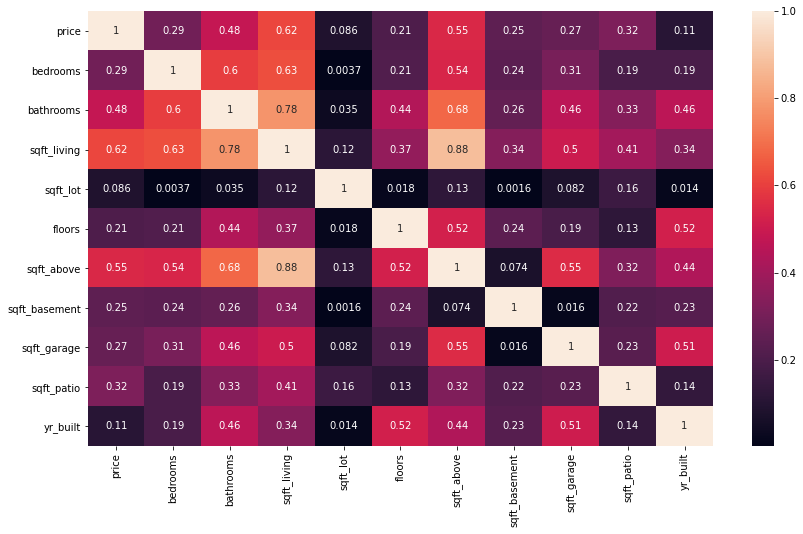

In [22]:
# Examine absolute correlation coefficients between numeric variables
# Sqft_living, sqft_above, and bathrooms appear to have the highest correlation with price of these variables
# Sqft_living and sqft_above appear to be highly correlated
numerical_categories = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                        'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio','yr_built']

fig, ax = plt.subplots(figsize = (14, 8))
sns.heatmap(df[numerical_categories].corr().abs(), annot = True, ax = ax);

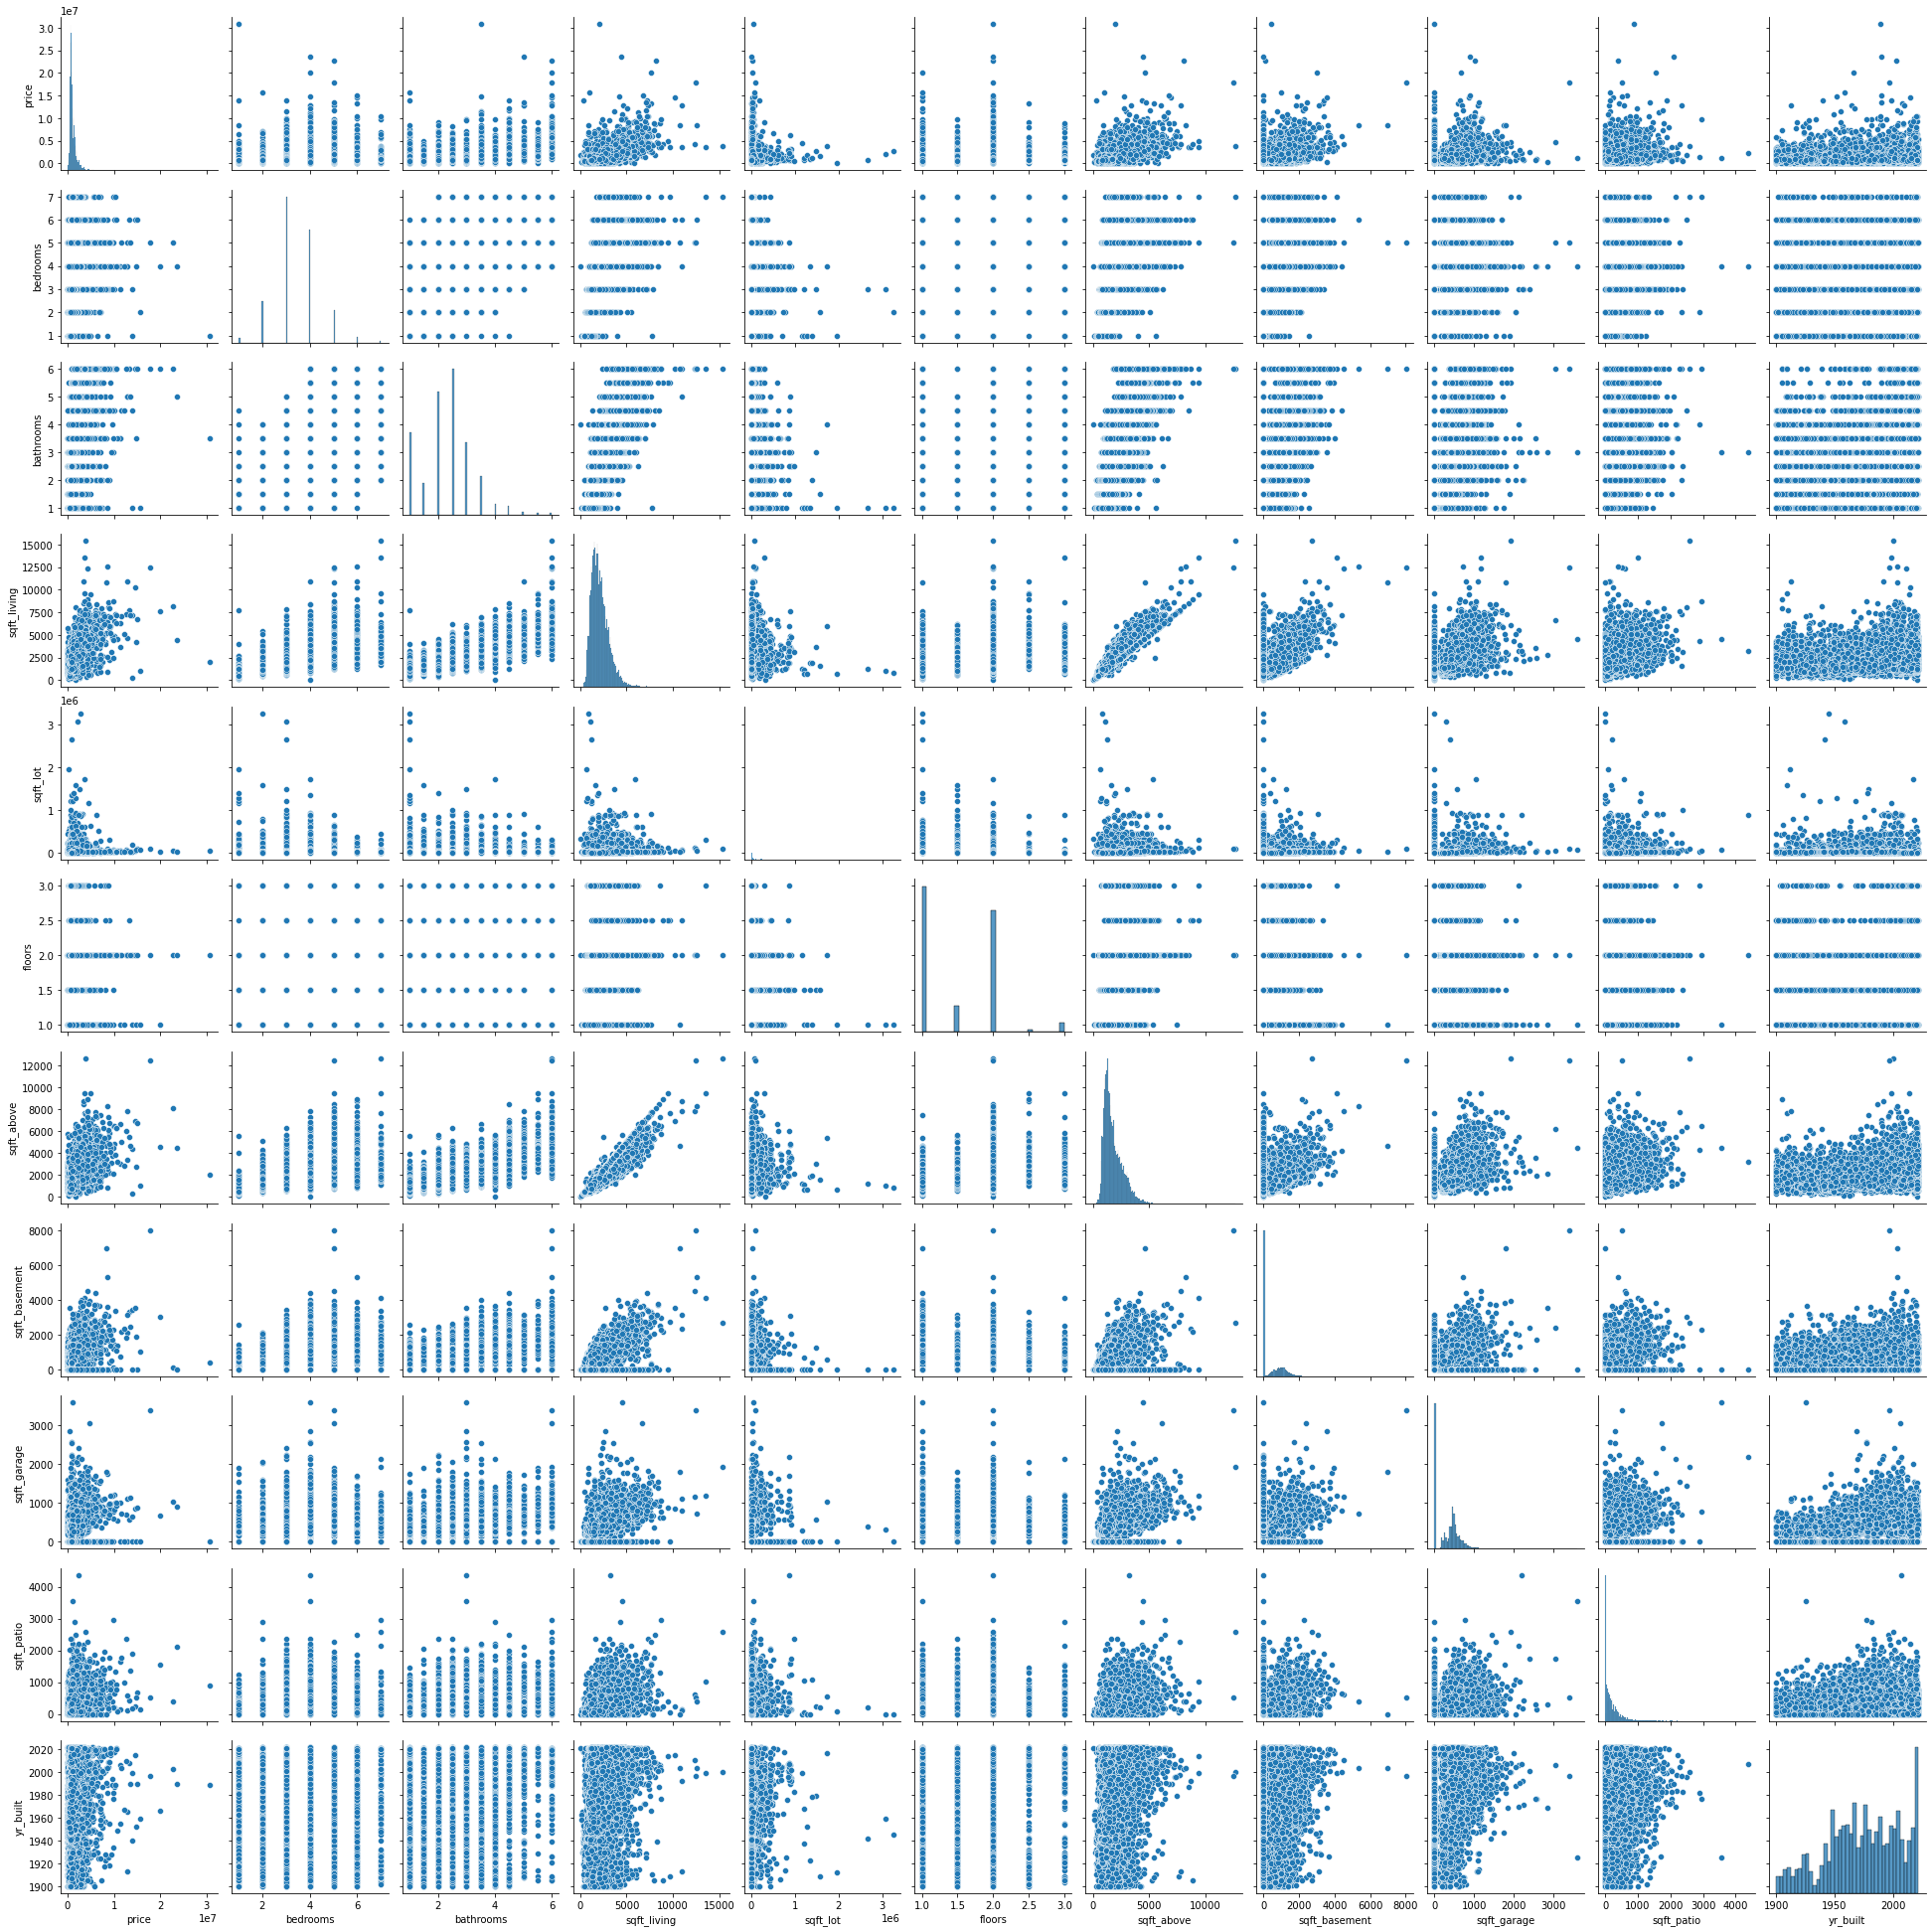

In [4]:
# Examine pairplot between numerical categories
sns.pairplot(df[numerical_categories]);

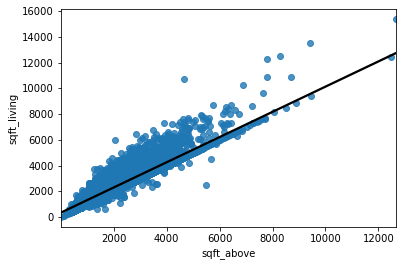

In [5]:
# Sqft_above and Sqft_living are highly correlated and seem to have a linear relationship
sns.regplot(x = df.sqft_above, y = df.sqft_living, ci=95, line_kws = {'color':'k'});

In [6]:
# Likely that sqft_above and sqft_living would result in multicollinearity if used together to model
print(sm.OLS(df.sqft_living, sm.add_constant(df.sqft_above)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            sqft_living   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 1.013e+05
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:07:12   Log-Likelihood:            -2.1946e+05
No. Observations:               29054   AIC:                         4.389e+05
Df Residuals:                   29052   BIC:                         4.389e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        344.8739      6.239     55.277      0.0

In [7]:
# Define plotting function to compare distributions of unaltered data vs. log-transformed data
# Given a column, create 2 seaborn histplots using that column, one untransformed and the other log-transformed
def plot_unaltered_vs_log(df, col):
    # Declare fig, ax objects
    fig, ax = plt.subplots(1, 2, figsize = (14, 8))
    
    # Create seaborn histplots
    sns.histplot(df[col], bins = 10, kde = True, ax = ax[0]);
    sns.histplot(np.log(df[col]), bins = 10, kde = True, ax = ax[1]);
    
    # Set x-labels
    ax[0].set_xlabel(col);
    ax[1].set_xlabel('log({})'.format(col));

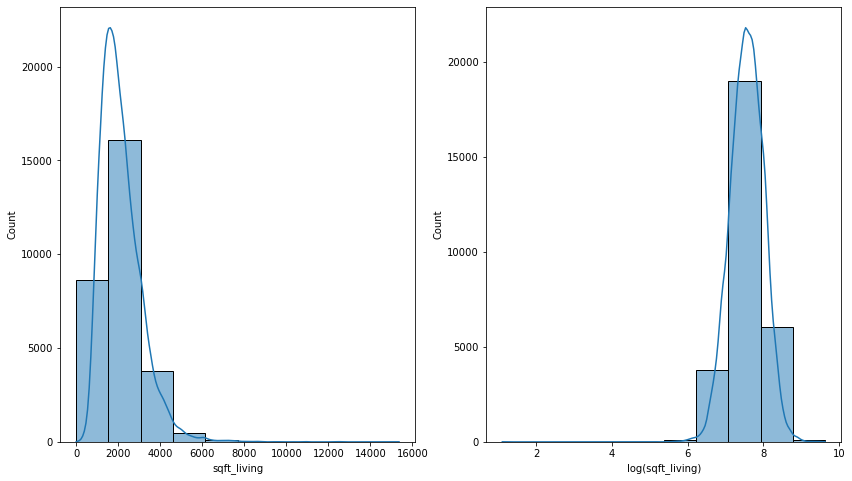

In [8]:
# Examine sqft_living, data looks much more normal after log transformation
plot_unaltered_vs_log(df, 'sqft_living')

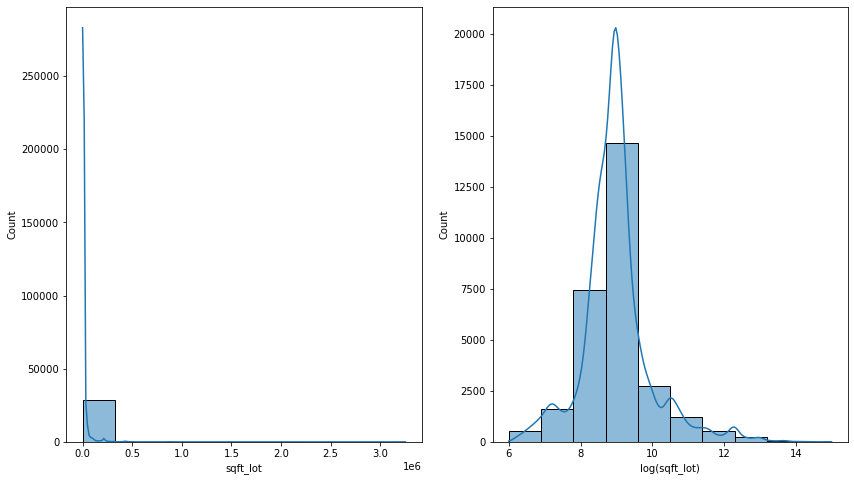

In [9]:
# Examing sqft_lot, data is still abnormal, but has better tails after log transformation
plot_unaltered_vs_log(df, 'sqft_lot')

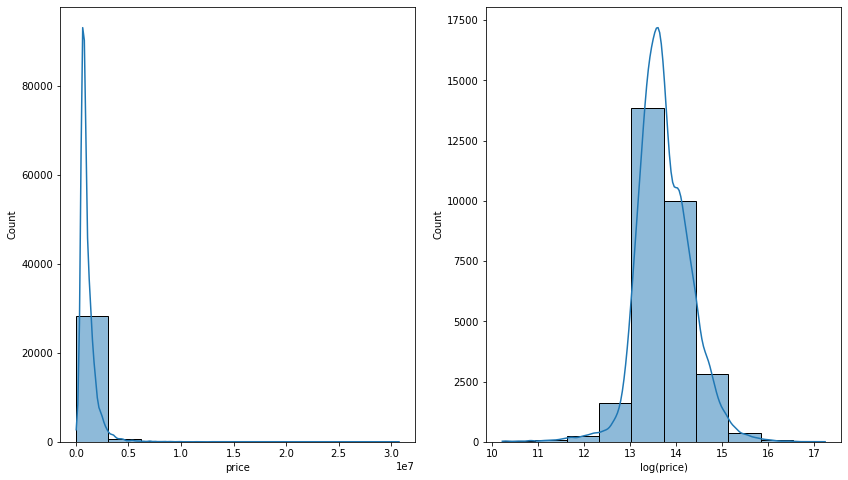

In [10]:
# Examine price, data is still abnormal, but has better tails after log transformation
plot_unaltered_vs_log(df, 'price')

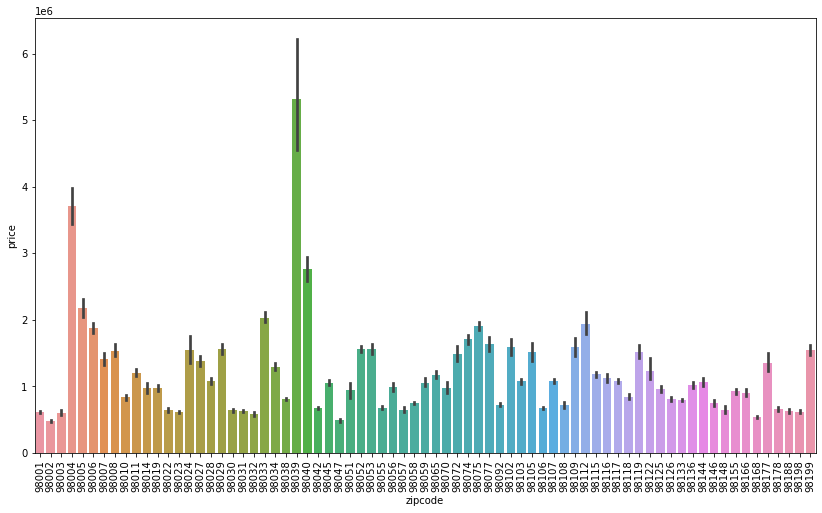

In [12]:
# Define a list of zip codes with > 30 records
sig_zip_codes = sorted(list(df.zipcode.value_counts()[df.zipcode.value_counts() > 30].index))

# Examine mean price by zip code, filter only by zip codes with > 30 records
# Large variation in mean price based on zip code
fig, ax = plt.subplots(figsize = (14, 8))
sns.barplot(x = df.loc[df.zipcode.isin(sig_zip_codes)].zipcode,
                       y = df.price,
                       ax = ax);
plt.xticks(rotation = 90);

In [13]:
# Examine the distribution of variables grouped by zip code
# For a given column in dataframe, create a list of significant zip codes
# Then, for each zipcode, create a seaborn histplot using that column, filtered on zip code
def dist_var_by_zipcode(df, col):
    sig_zip_codes = sorted(list(df.zipcode.value_counts()[df.zipcode.value_counts() > 30].index))
    
    # Hardcoded for 78 values based on current dataset, will break if dataset has more zipcodes
    # Declare fig, axes objects, declare tight layout
    fig, ax = plt.subplots(20, 4, figsize = (20, 60))
    plt.tight_layout(pad = 4.0)
    
    # Create seaborn histplots and axis titles
    for i, zipcode in enumerate(sig_zip_codes):
        axis = ax[i // 4][i % 4]
        sns.histplot(df.loc[df.zipcode == zipcode][col], kde = True, ax = axis);
        axis.set_title('{} in {}'.format(col, zipcode));

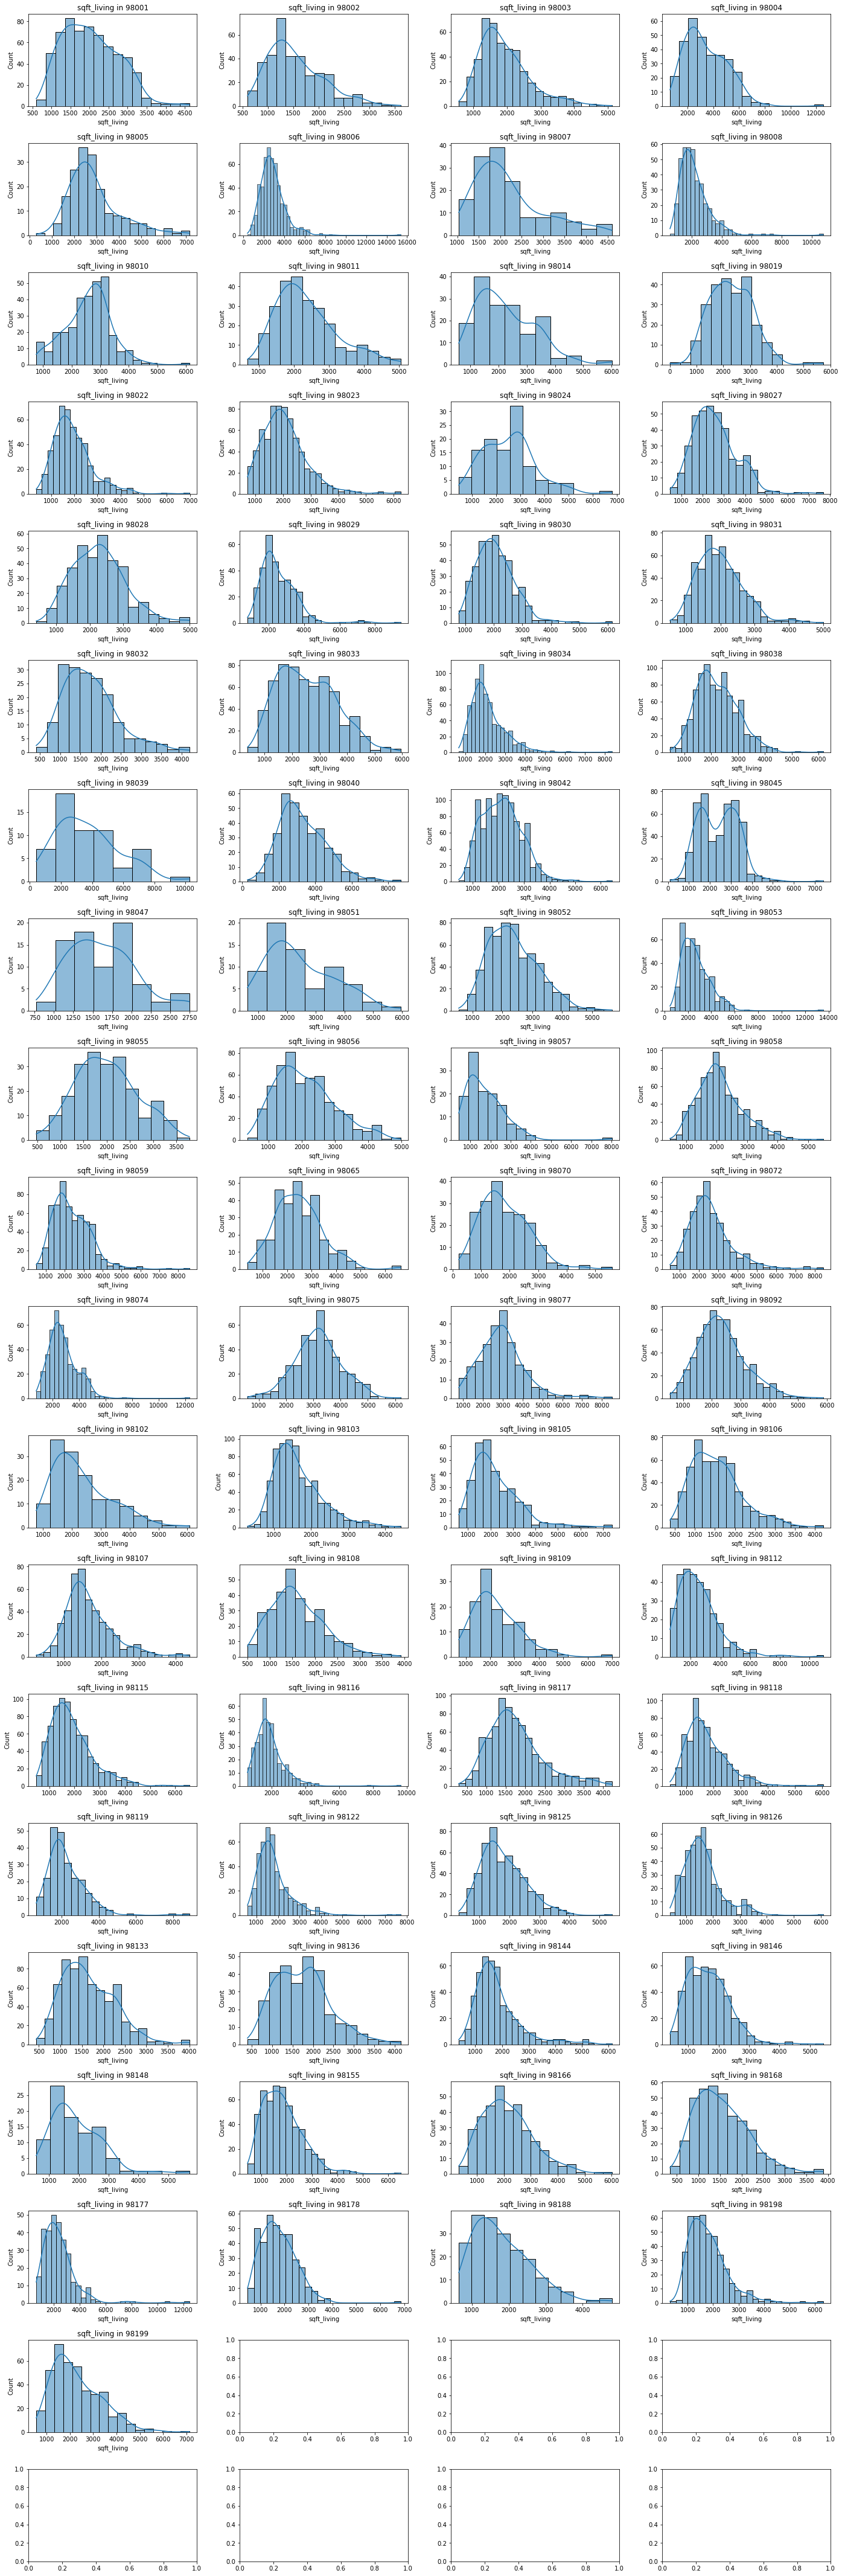

In [14]:
# Examine the distribution of sqft_living grouped by zip code
# Some amount of variance in sqft_living by zip code
dist_var_by_zipcode(df, 'sqft_living')

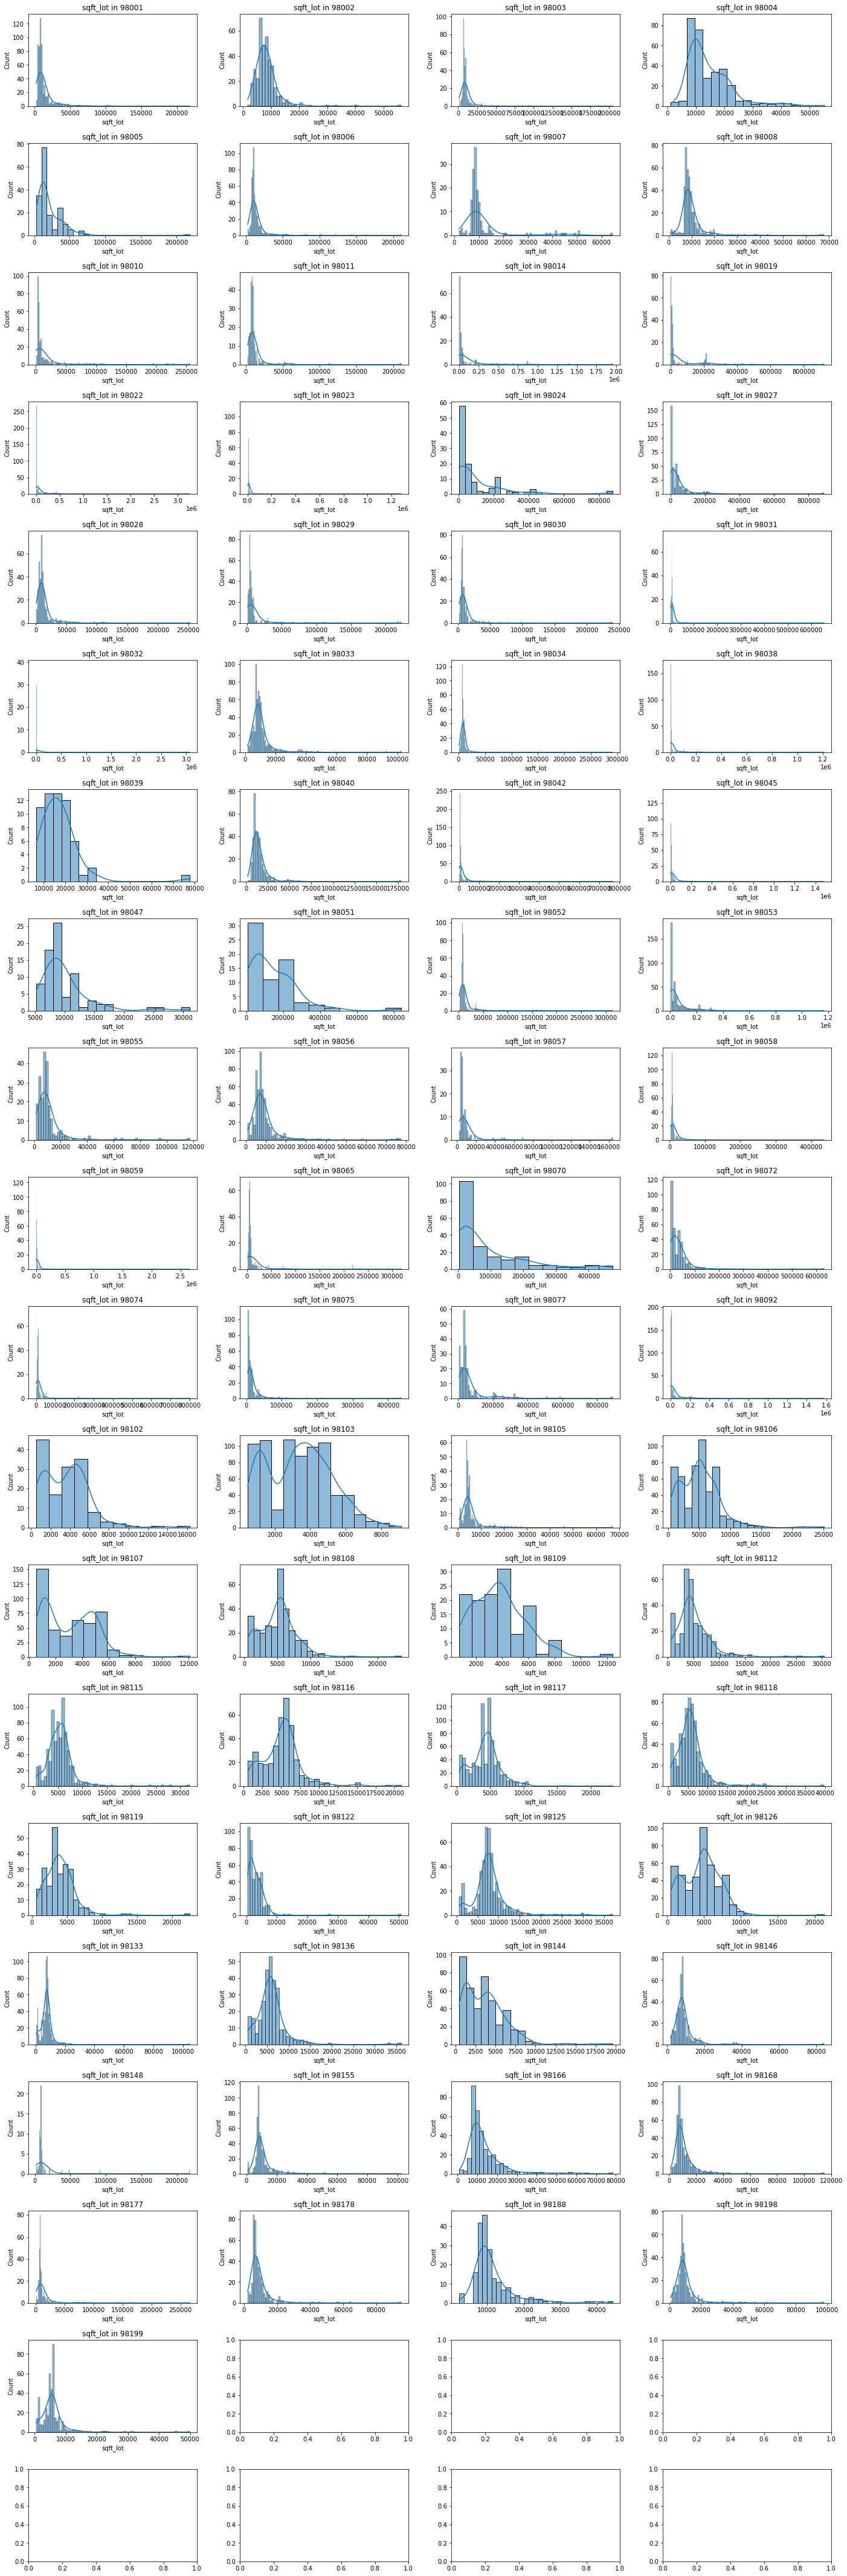

In [15]:
# Examine the distribution of sqft_lot grouped by zip code
# Some amount of variance in sqft_lot by zip code
dist_var_by_zipcode(df, 'sqft_lot')

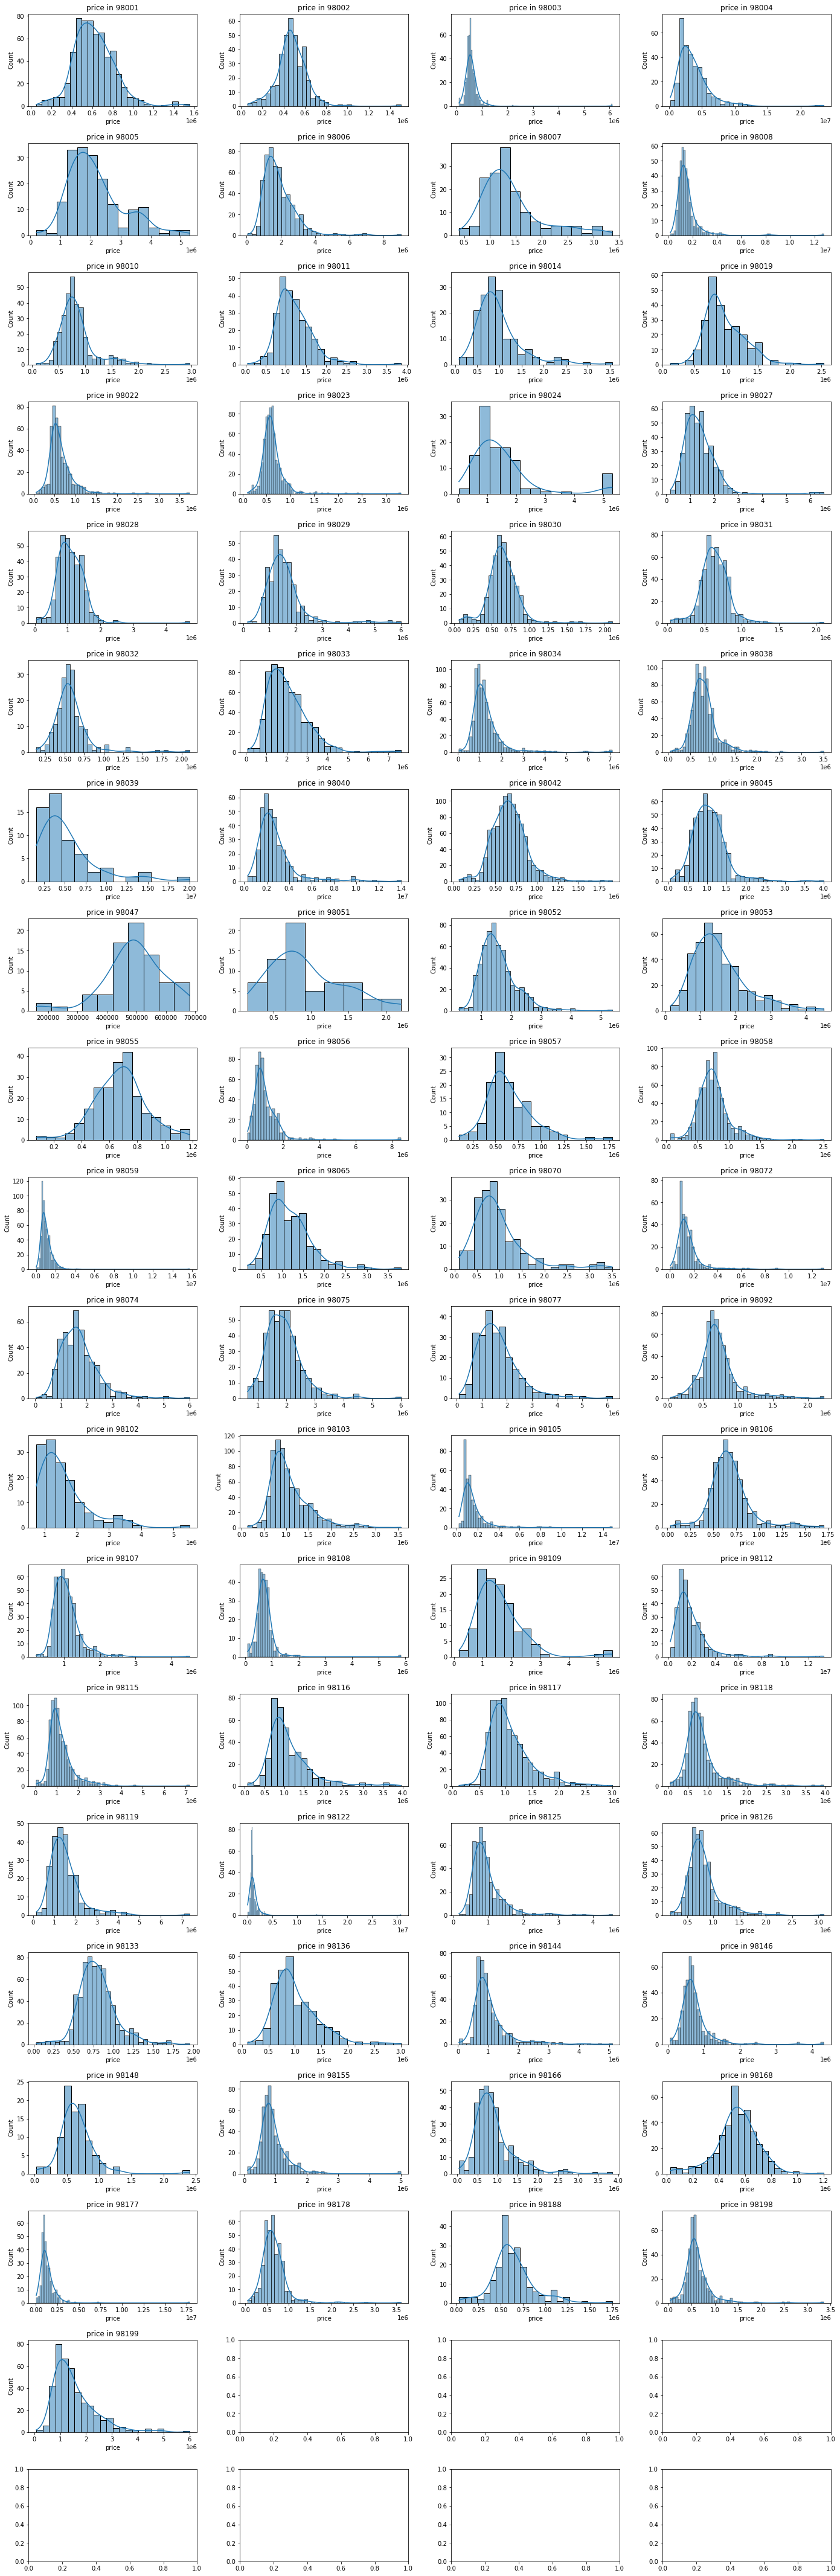

In [16]:
# Examine the distribution of price grouped by zip code
# Lots of variance in price due to zip code
dist_var_by_zipcode(df, 'price')

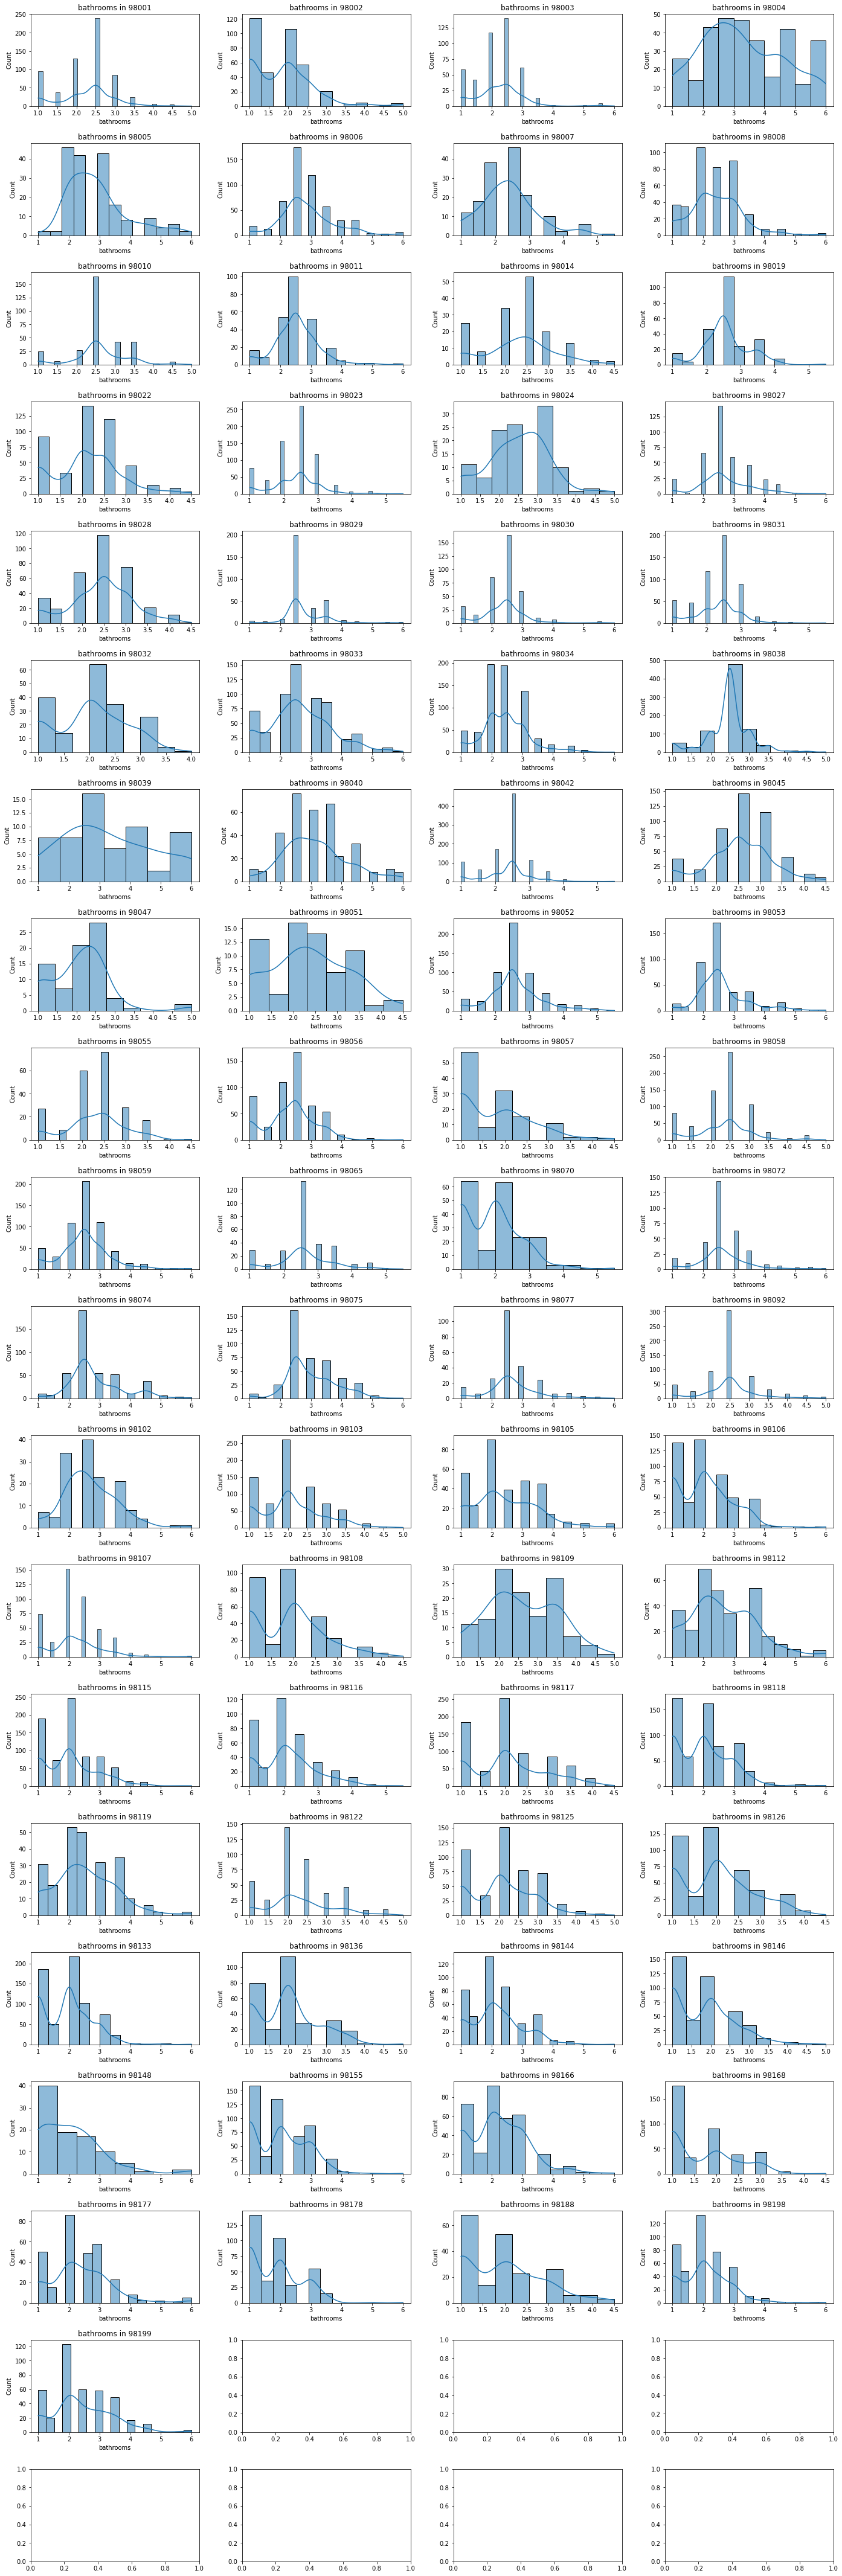

In [17]:
# Examine the distribution of bathrooms grouped by zip code
# Observed differences here may be better explained by sqft_living variation by zip code
dist_var_by_zipcode(df, 'bathrooms')

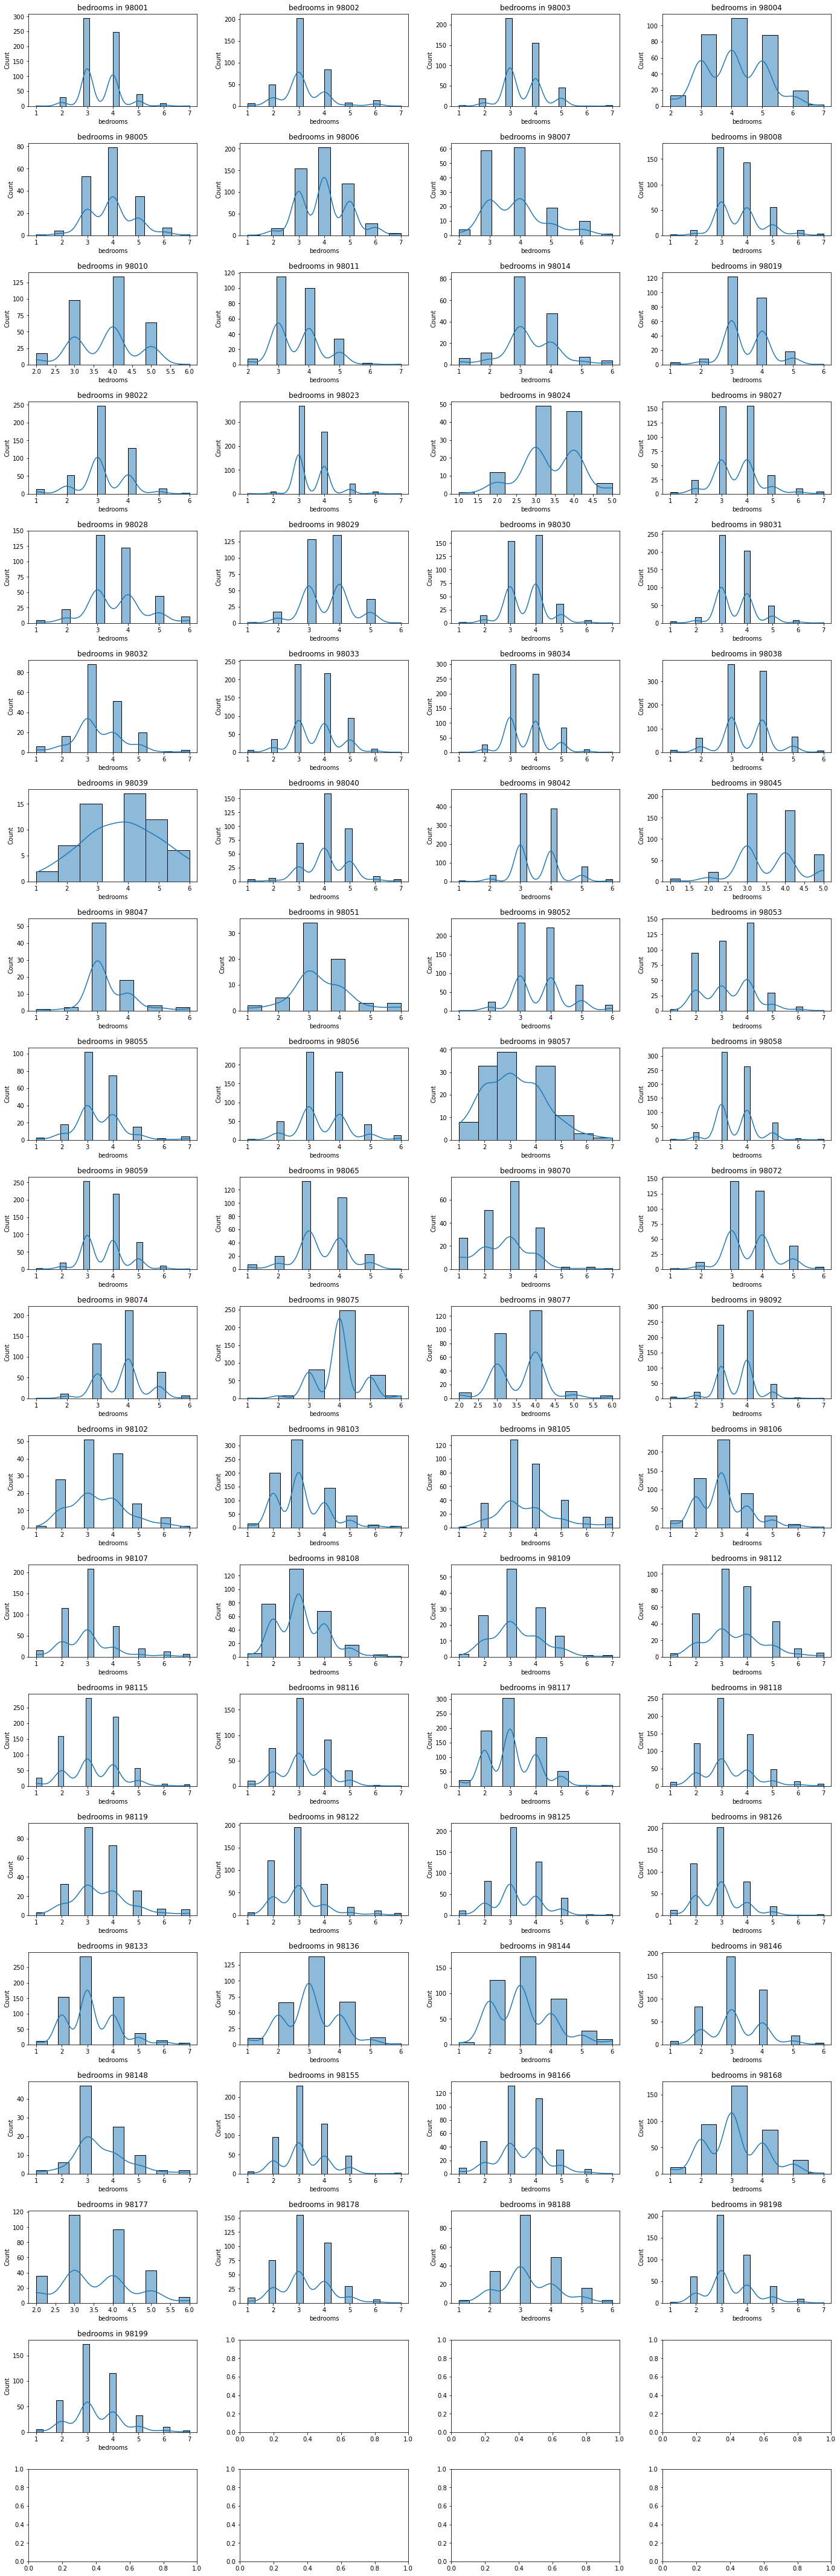

In [18]:
# Examine the distribution of bedrooms grouped by zip code
# Observed differences here may be better explained by sqft_living variation by zip code
dist_var_by_zipcode(df, 'bedrooms')

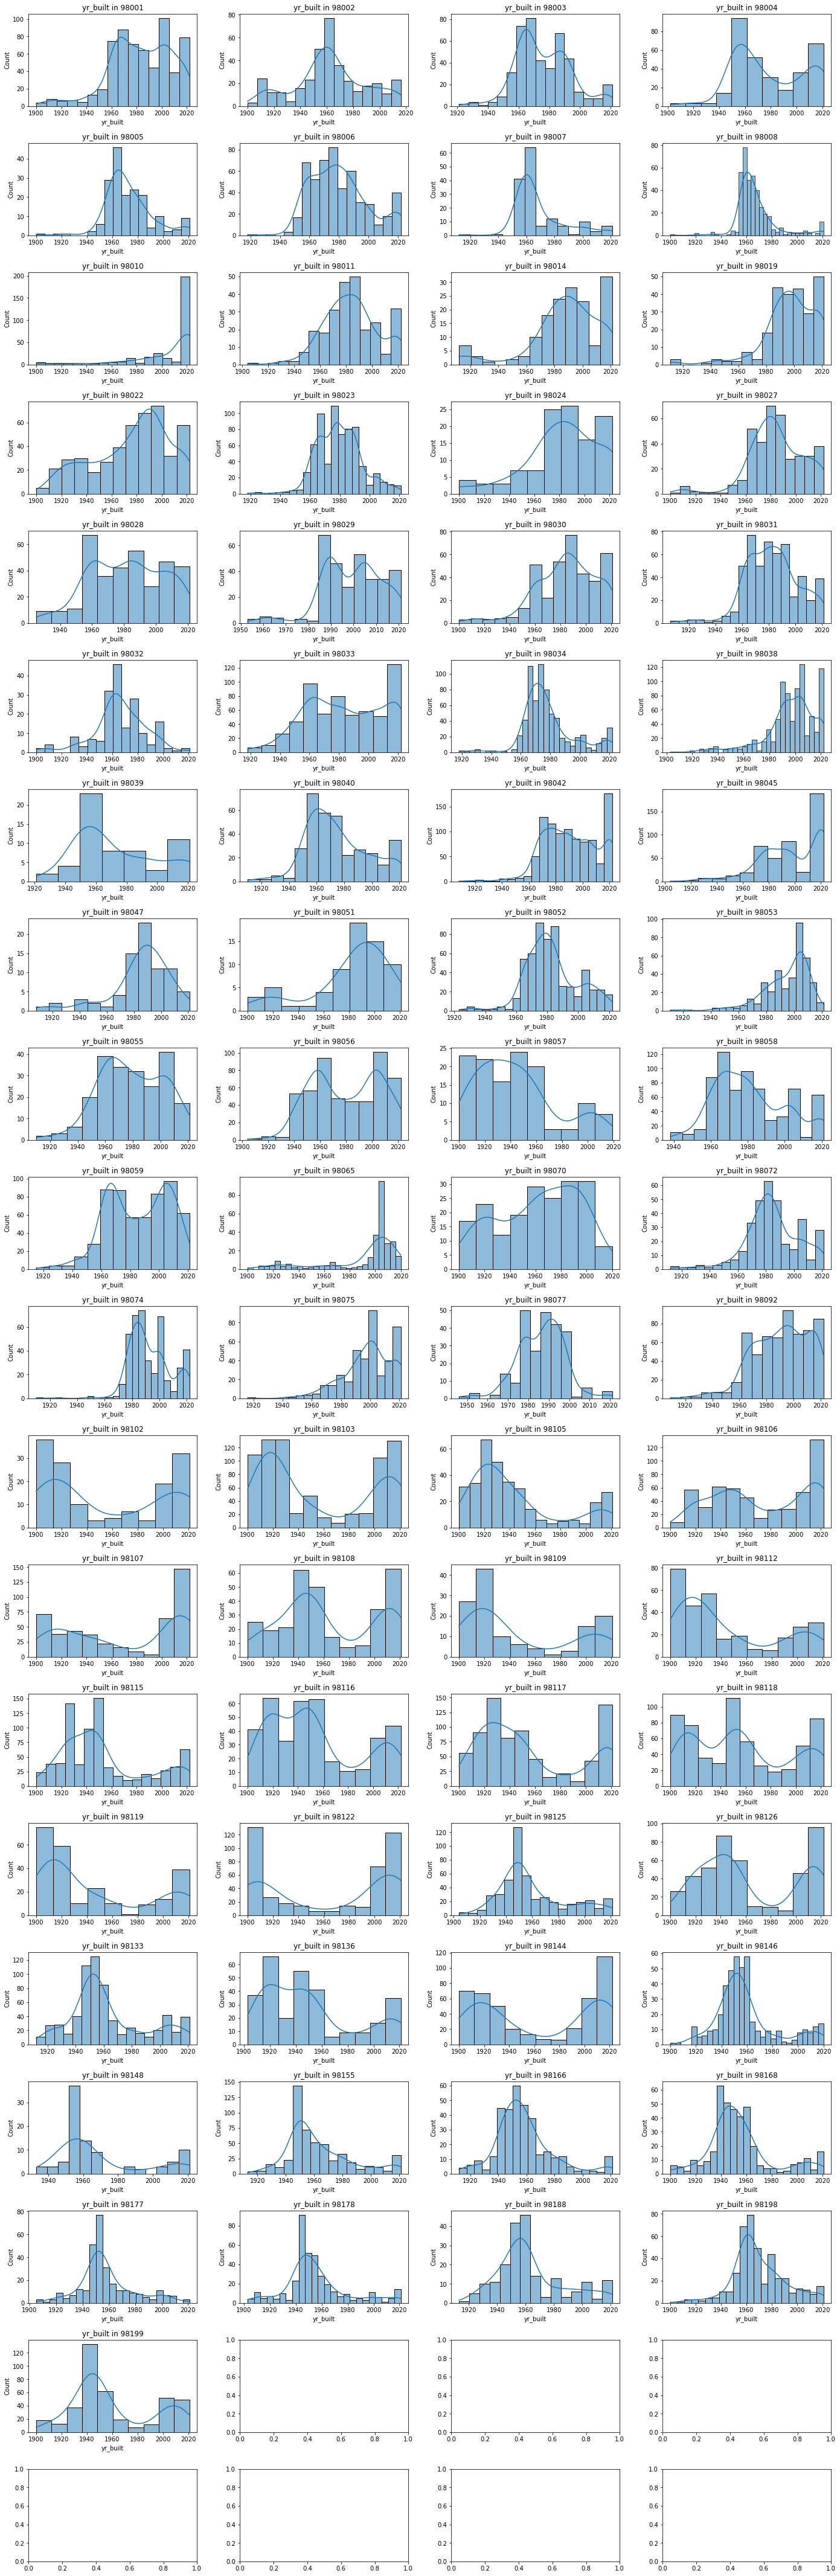

In [19]:
# Examine the distribution of yr_built grouped by zip code
# Certain districts have a higher density of newer homes than others
dist_var_by_zipcode(df, 'yr_built')

In [20]:
# For a given column, create seaborn barplots using that column against mean price and mean log-transformed price
def barplot_unalt_vs_log_price(df, col):
    fig, ax = plt.subplots(1, 2, figsize = (14,8))
    sns.barplot(data = df, x = col, y = 'price', ax = ax[0]);
    sns.barplot(data = df, x = col, y = np.log(df.price), ax = ax[1]);
    ax[1].set_ylabel('log(price)');

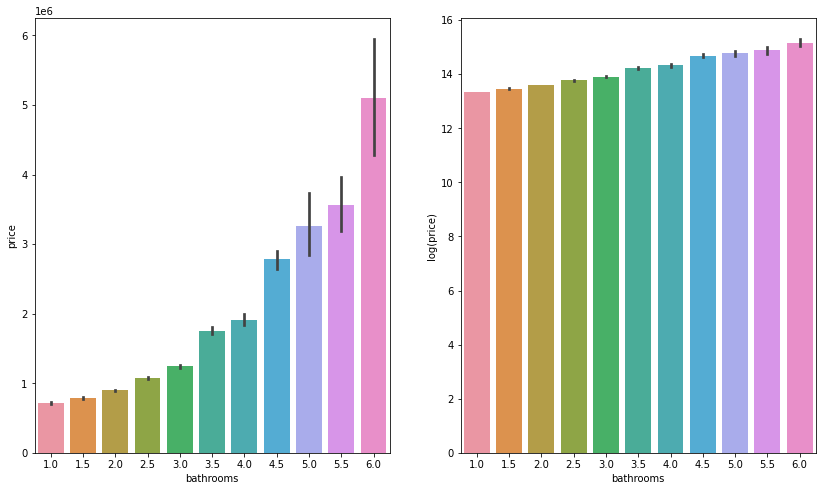

In [21]:
# Examine bathrooms vs. mean price and mean log(price)
# Generally, it appears that more bathrooms correlates to higher price (as expected)
barplot_unalt_vs_log_price(df, 'bathrooms')

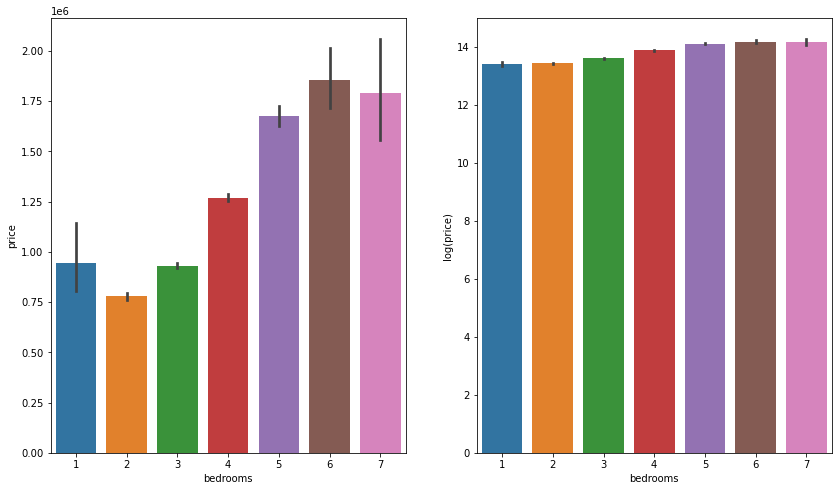

In [22]:
# Examine bedrooms vs. mean price and mean log(price)
# Generally, it appears that more bedrooms correlates to higher price (as expected)
barplot_unalt_vs_log_price(df, 'bedrooms')

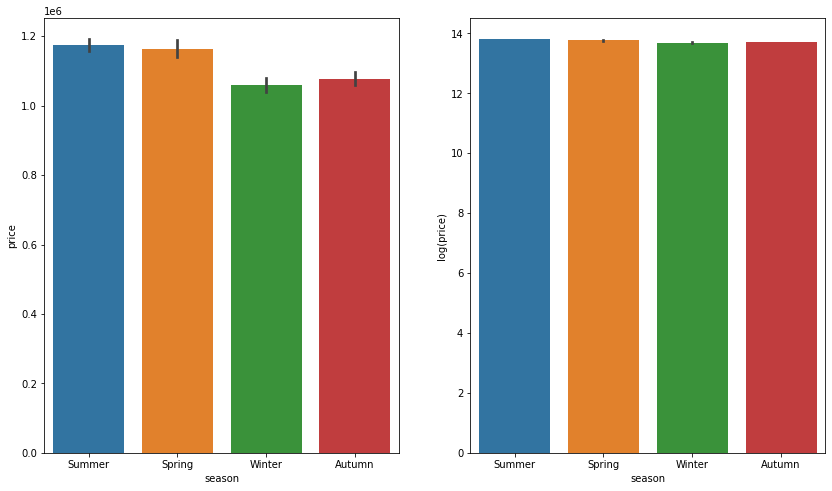

In [23]:
# Examine season vs. mean price and mean log(price)
# Mean sales price is highest in summer and lowest in winter, which is understandable
# Overall, relatively little difference in mean price by season
barplot_unalt_vs_log_price(df,'season')

In [23]:
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis = 1),
                                                     df.price,
                                                     test_size = 0.33,
                                                     random_state = 42)

In [25]:
# Examine all X_train categorical columns to determine best one-hot encoding choice for X_train
columns_to_view = ['sewer_system', 'heat_source', 'view', 'condition', 'grade', 'zipcode', 'season']

print(*[X_train[col].value_counts() for col in columns_to_view], sep = '\n\n')

PUBLIC     16517
PRIVATE     2949
Name: sewer_system, dtype: int64

Gas                  13444
Electricity           3952
Oil                   1927
Gas/Solar               70
Electricity/Solar       37
Other                   36
Name: heat_source, dtype: int64

NONE         17093
AVERAGE       1271
GOOD           593
EXCELLENT      368
FAIR           141
Name: view, dtype: int64

Average      11699
Good          5382
Very Good     2192
Fair           151
Poor            42
Name: condition, dtype: int64

5     7762
6     5829
7     2400
4     1906
8      888
3      280
9      265
10      94
2       30
1       12
Name: grade, dtype: int64

98042    669
98038    569
98117    520
98115    512
98103    493
        ... 
98288     14
98354      9
98251      2
98050      2
98224      2
Name: zipcode, Length: 78, dtype: int64

Autumn    6122
Summer    5192
Winter    4737
Spring    3415
Name: season, dtype: int64


In [26]:
# Do the same for X_test
print(*[X_test[col].value_counts() for col in columns_to_view], sep = '\n\n')

PUBLIC     8183
PRIVATE    1405
Name: sewer_system, dtype: int64

Gas                  6639
Electricity          1919
Oil                   971
Gas/Solar              23
Electricity/Solar      19
Other                  17
Name: heat_source, dtype: int64

NONE         8437
AVERAGE       619
GOOD          275
EXCELLENT     183
FAIR           74
Name: view, dtype: int64

Average      5758
Good         2664
Very Good    1066
Fair           78
Poor           22
Name: condition, dtype: int64

5     3762
6     2926
7     1164
4      948
8      461
9      137
3      112
10      52
2       21
1        5
Name: grade, dtype: int64

98042    323
98038    288
98103    250
98115    244
98058    232
        ... 
98354     14
98039     14
98288      5
98224      2
98251      1
Name: zipcode, Length: 77, dtype: int64

Autumn    2977
Summer    2518
Winter    2324
Spring    1769
Name: season, dtype: int64


In [24]:
# References: heat_source = Gas, sewer_system = PUBLIC, zipcode = 98042, season = Autumn
# Happens to be the same for both train and test
col_to_ohe_always = ['sewer_system', 'heat_source', 'zipcode', 'season']

X_train = pd.get_dummies(X_train, columns = col_to_ohe_always)
X_train.drop(['heat_source_Gas', 'sewer_system_PUBLIC', 'zipcode_98042', 'season_Autumn'], axis = 1, inplace = True)

X_test = pd.get_dummies(X_test, columns = col_to_ohe_always)
X_test.drop(['heat_source_Gas', 'sewer_system_PUBLIC', 'zipcode_98042', 'season_Autumn'], axis = 1, inplace = True)

In [25]:
# Ordinalize remaining categorical information
X_train_ordinalized = X_train.copy()
X_test_ordinalized = X_test.copy()

# Convert view and condition columns to numerical ordinal information
view_map = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
condition_map = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}

X_train_ordinalized.view = X_train_ordinalized.view.apply(lambda x: view_map[x])
X_train_ordinalized.condition = X_train_ordinalized.condition.apply(lambda x: condition_map[x])

X_test_ordinalized.view = X_test_ordinalized.view.apply(lambda x: view_map[x])
X_test_ordinalized.condition = X_test_ordinalized.condition.apply(lambda x: condition_map[x])

In [26]:
# One-hot encode remaining categorical information
X_train_ohe = X_train.copy()
X_test_ohe = X_test.copy()

# Convert grade column to categorical information
grade_map = {1: 'Poor', 2: 'Low', 3: 'Fair', 4: 'Low_Average', 5: 'Average',
             6: 'Good', 7: 'Better', 8: 'Very_Good', 9: 'Excellent', 10: 'Luxury'}
X_train_ohe.grade = X_train_ohe.grade.apply(lambda x: grade_map[x])
X_test_ohe.grade = X_test_ohe.grade.apply(lambda x: grade_map[x])

# One hot encode selected columns, grade reference = Average, condition reference = Average, view reference = NONE
# Happens to be the same for both train and test
col_to_ohe = ['view', 'condition', 'grade']

X_train_ohe = pd.get_dummies(X_train_ohe, columns = col_to_ohe)
X_train_ohe.drop(['grade_Average', 'condition_Average', 'view_NONE'], axis = 1, inplace = True)

X_test_ohe = pd.get_dummies(X_test_ohe, columns = col_to_ohe)
X_test_ohe.drop(['grade_Average', 'condition_Average', 'view_NONE'], axis = 1, inplace = True)

In [33]:
# Create combined data frame with both ordinalized and one-hot encoded columns
X_train_merged = X_train_ordinalized.reset_index().merge(X_train_ohe,
                                                         how = 'left',
                                                         on = [x for x in X_train.columns.values\
                                                             if x not in col_to_ohe]).set_index('index')

X_test_merged = X_test_ordinalized.reset_index().merge(X_test_ohe,
                                                       how = 'left',
                                                       on = [x for x in X_test.columns.values\
                                                             if x not in col_to_ohe]).set_index('index')

In [34]:
# Combine X and y values for train and test into merged dataframes for further processing
# Drop address as column is not needed for modeling purposes but was needed for merging purposes
full_train = pd.concat([y_train, X_train_merged], axis = 1).drop('address', axis = 1)
full_test = pd.concat([y_test, X_test_merged], axis = 1).drop('address', axis = 1)

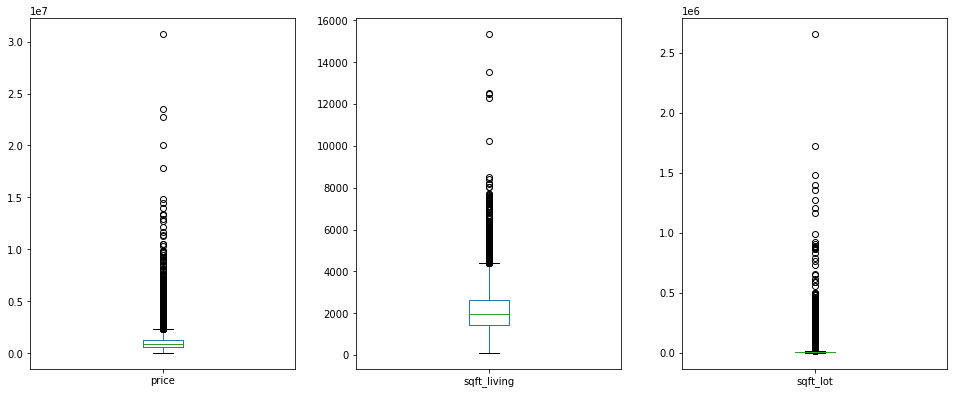

In [32]:
# Examine boxplots of price, sqft_living, and sqft_lot categories
# There are a lot of outliers in price, sqft_living, and sqft_lot
# Declare fig, ax objects and tight layout
fig, ax = plt.subplots(1, 3, figsize = (14, 6))
plt.tight_layout(pad = 3.0)

# Plot pandas boxplots
full_train.price.plot.box(ax = ax[0]);
full_train.sqft_living.plot.box(ax = ax[1]);
full_train.sqft_lot.plot.box(ax = ax[2]);

In [35]:
# Naively, define an acceptable upper bound for outliers of meaning as 3x standard boxplot maximum
max_outliers_train = (full_train.quantile(0.75) +\
                      (1.5 * (full_train.quantile(0.75) - full_train.quantile(0.25)))) * 3

categories_strip_max = ['price', 'sqft_living', 'sqft_lot']

# Drop entries above defined upper bound
for category in categories_strip_max:
    full_train = full_train.loc[full_train[category] <= max_outliers_train[category]]

In [34]:
# Calculate amount of data dropped - removed around ~4.4% of data
(len(full_train) - len(X_train))/(len(X_train))

-0.043871365457721155

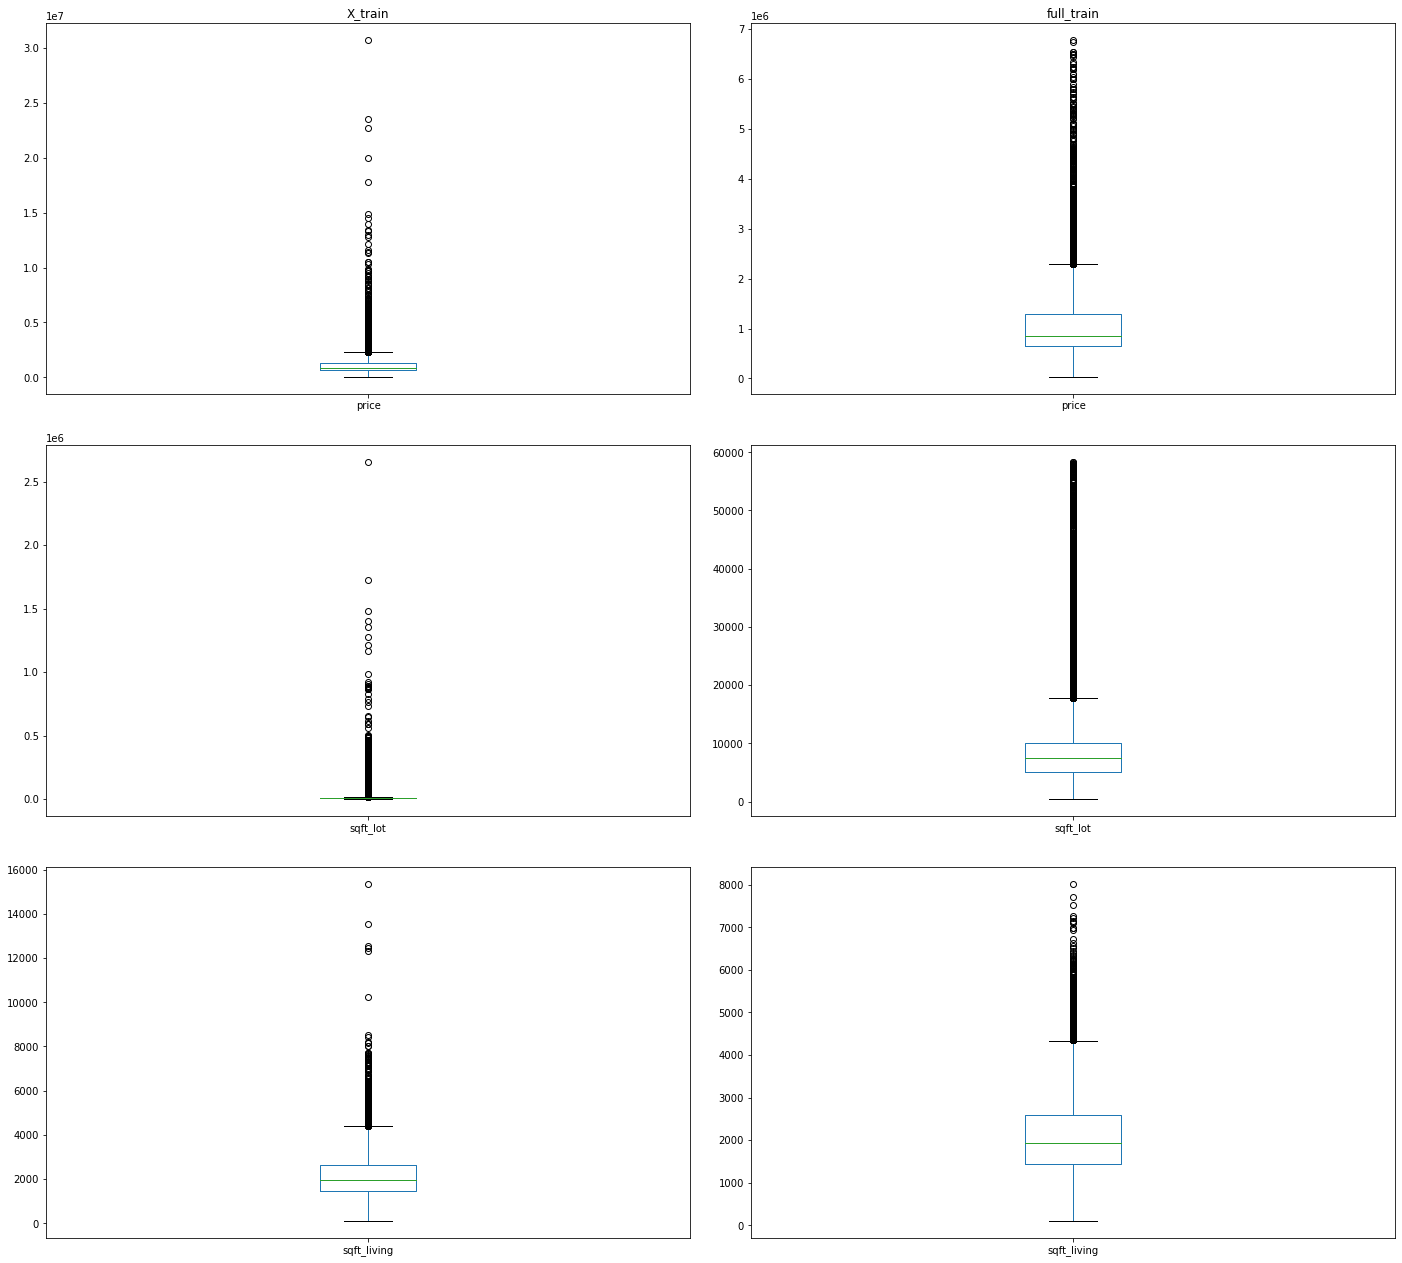

In [35]:
# Comparisons of previous and cleaned price, sqft_living, and sqft_lot categories
# Declare fig, ax objects and tight layout
fig, ax = plt.subplots(3, 2, figsize = (20, 18))
plt.tight_layout(pad = 3.0)

# Set column titles
ax[0][0].set_title('With Large Outliers')
ax[0][1].set_title('With Large Outliers Removed')

# Plot pandas boxplots
y_train.plot.box(ax = ax[0][0]);
full_train.price.plot.box(ax = ax[0][1]);
X_train.sqft_lot.plot.box(ax = ax[1][0]);
full_train.sqft_lot.plot.box(ax = ax[1][1]);
X_train.sqft_living.plot.box(ax = ax[2][0]);
full_train.sqft_living.plot.box(ax = ax[2][1]);

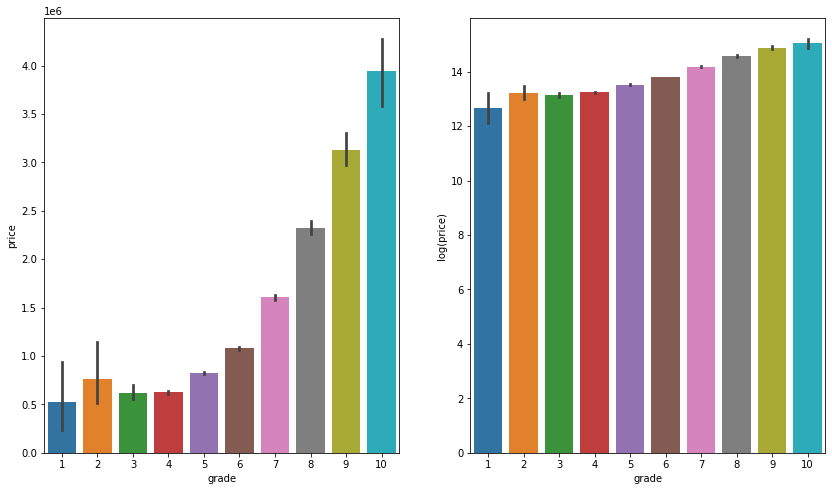

In [36]:
# Now that grade has been ordinalized, examine grade vs. mean price and mean log(price)
# As expected, as grade increases, mean price increases
barplot_unalt_vs_log_price(full_train, 'grade')

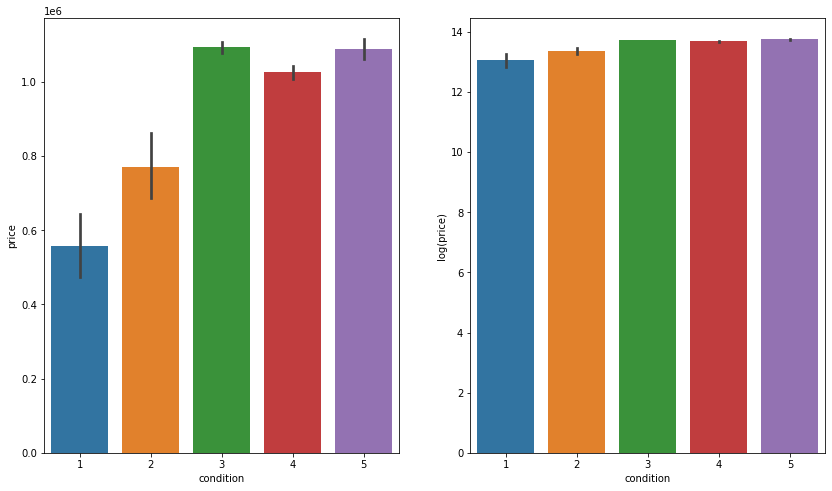

In [37]:
# Now that condition has been ordinalized, examine condition vs. mean price and mean log(price)
# Surprisingly, there is not much difference between mean prices of condition 1-2 houses and condition 3-5 houses
barplot_unalt_vs_log_price(full_train, 'condition')

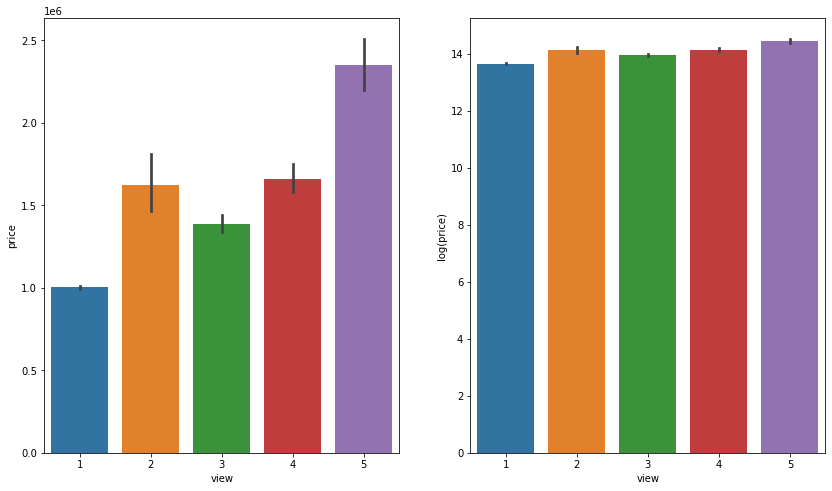

In [38]:
# Now that view has been ordinalized, examine view vs. mean price and mean log(price)
# Not much difference in mean price by view, except when view is maximal
barplot_unalt_vs_log_price(full_train, 'view')

In [36]:
# Elements to create log transforms of based off of earlier analysis
to_log_transform = ['sqft_above', 'sqft_lot', 'sqft_living', 'price']

# Although not explicitly graphed, assume all sqft values could be log transformed
# However, these columns contain zero values which break np.log (as log(0) approaches -infinity)
# Thus, shift using log(1 + x), which slightly complicates interpretation but preserves log transform functionality
to_log_shift_one_transform = ['sqft_patio', 'sqft_garage', 'sqft_basement']

# Given a dataframe, column, and shift, create a new column in dataframe 
def create_log_transformed_col(df, col, shift = 0):
    new_col_string = 'log({}_plus_{})'.format(col, shift)
    df[new_col_string] = np.log(df[col] + shift)
    
for col in to_log_transform:
    create_log_transformed_col(full_train, col)
for col in to_log_shift_one_transform:
    create_log_transformed_col(full_train, col, shift = 1)

In [37]:
# Create first-degree interactions between select X-values for later use in modeling
rel_X_values = full_train.drop(['price', 'log(price_plus_0)'], axis = 1).columns.values
binaries = ['waterfront', 'greenbelt', 'nuisance']
ordinals = ['view', 'condition', 'grade']
discrete = ['bedrooms', 'bathrooms', 'floors', 'yr_built']
continuous = [x for x in rel_X_values if 'sqft' in x and 'log' not in x]
zipcodes = [x for x in rel_X_values if 'zip' in x]
log_continuous = [x for x in rel_X_values if 'log' in x]
ordinal_ohes = [x for x in rel_X_values if ('view' in x or 'condition' in x or 'grade' in x)\
                and '_' in x]
ohes = [x for x in rel_X_values if '_' in x \
        and x not in set(itt.chain(binaries, ordinals, discrete, continuous,\
                                   log_continuous, zipcodes, ordinal_ohes))]

def create_first_degree_interactions(df, first_cols, second_cols):
    for col_1 in first_cols:
        for col_2 in second_cols:
            if col_1 != col_2:
                col_string = '{}_x_{}'.format(col_1, col_2)
                df[col_string] = df[col_1] * df[col_2]

both_continuous = continuous + log_continuous
both_ordinals = ordinals + ordinal_ohes
else_not_zipcode = binaries + discrete + ohes

create_first_degree_interactions(full_train, both_continuous, both_ordinals)
create_first_degree_interactions(full_train, both_continuous, else_not_zipcode)
create_first_degree_interactions(full_train, else_not_zipcode, both_ordinals)
create_first_degree_interactions(full_train, both_continuous, zipcodes)
create_first_degree_interactions(full_train, both_ordinals, zipcodes)
create_first_degree_interactions(full_train, else_not_zipcode, zipcodes)

In [38]:
# Perform all of the same operations on the test data
# Strip upper outliers
max_outliers_test = (full_test.quantile(0.75) +\
                      (1.5 * (full_test.quantile(0.75) - full_test.quantile(0.25)))) * 3

for category in categories_strip_max:
    full_test = full_test.loc[full_test[category] <= max_outliers_test[category]]

# Create log transforms    
for col in to_log_transform:
    create_log_transformed_col(full_test, col)
for col in to_log_shift_one_transform:
    create_log_transformed_col(full_test, col, shift = 1)
    
# Create first-degree interactions between select X-values for later use in modeling
rel_X_values = full_test.drop(['price', 'log(price_plus_0)'], axis = 1).columns.values
binaries = ['waterfront', 'greenbelt', 'nuisance']
ordinals = ['view', 'condition', 'grade']
discrete = ['bedrooms', 'bathrooms', 'floors', 'yr_built']
continuous = [x for x in rel_X_values if 'sqft' in x and 'log' not in x]
zipcodes = [x for x in rel_X_values if 'zip' in x]
log_continuous = [x for x in rel_X_values if 'log' in x]
ordinal_ohes = [x for x in rel_X_values if ('view' in x or 'condition' in x or 'grade' in x)\
                and '_' in x]
ohes = [x for x in rel_X_values if '_' in x \
        and x not in set(itt.chain(binaries, ordinals, discrete, continuous,\
                                   log_continuous, zipcodes, ordinal_ohes))]

both_continuous = continuous + log_continuous
both_ordinals = ordinals + ordinal_ohes
else_not_zipcode = binaries + discrete + ohes

create_first_degree_interactions(full_test, both_continuous, both_ordinals)
create_first_degree_interactions(full_test, both_continuous, else_not_zipcode)
create_first_degree_interactions(full_test, else_not_zipcode, both_ordinals)
create_first_degree_interactions(full_test, both_continuous, zipcodes)
create_first_degree_interactions(full_test, both_ordinals, zipcodes)
create_first_degree_interactions(full_test, else_not_zipcode, zipcodes)

In [39]:
# Write to parquet files for use in modeling
full_train.to_parquet('../data/cleaned/all_features_train.parquet')
full_test.to_parquet('../data/cleaned/all_features_test.parquet')